In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and
covariance matrix. These parameters are analogous to the mean (average or "center") and variance (standard deviation, or "width," squared) of the one-dimensional normal distribution.

# 

Read the files labeled as 'sampleX.txt' using numpy or pandas and plot them.

In [2]:
import pandas as pd

In [3]:
s1 = pd.read_csv("sample1.txt", sep="\t")
s2 = pd.read_csv("sample2.txt", sep="\t")
s3 = pd.read_csv("sample3.txt", sep="\t")

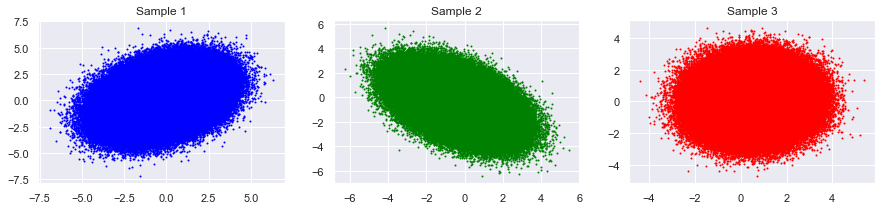

In [110]:
%matplotlib inline
plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.scatter(s1.x, s1.y, color = "blue", s=1)
plt.title("Sample 1")
plt.subplot(132)
plt.scatter(s2.x, s2.y, color = "green", s=1)
plt.title("Sample 2")
plt.subplot(133)
plt.scatter(s3.x, s3.y, color = "red", s=1)
plt.title("Sample 3")

plt.show()


Determine whether each sample is correlated, anticorrelated or uncorrelated.

In [5]:
s1.corr()

,x,y
x,1.000000,0.325752
y,0.325752,1.000000


Sample 1 is correlated.

In [6]:
s2.corr()

,x,y
x,1.000000,-0.472396
y,-0.472396,1.000000


Sample2 is anti-correlated

In [7]:
s3.corr()

,x,y
x,1.00000,0.03108
y,0.03108,1.00000


Sample 3 is uncorrelated.

## 3d Plot
Plot the joint probability distribution of each sample in 3D. For this you can use 'plot_surface' found in matplotlib library.

If you want to plot using matplotlib, the codes below will come in handy. First line makes sure that your plots are interactive, second line provides color maps.

In [13]:
from matplotlib import cm
import matplotlib
matplotlib.rc_file_defaults()
#Code here

At the first step try to get the 2D histogram of your data. (Hint: beware of different sizes of arrays!)

In [117]:
def getXYZ(sample, bins):
    z , x, y = np.histogram2d(sample.x, sample.y, bins = bins)
    x, y = np.meshgrid(x[:-1], y[:-1])
    return x, y, z

def plot3D(x, y, z, title):
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes(projection='3d')
    surface = ax.plot_surface(x, y , z, cmap=cm.coolwarm, antialiased=False)
    ax.set_title(title)
    fig.colorbar(surface, shrink=0.5, aspect=5)

    plt.show()

Now you can plot the 3D histogram:

In [118]:
bins = 100

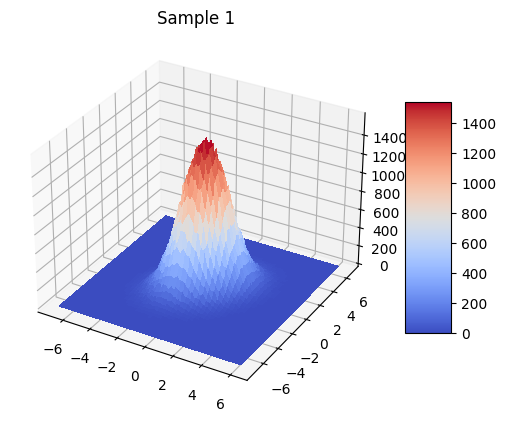

In [119]:
s1_xyz = getXYZ(s1, bins)
plot3D(*s1_xyz, "Sample 1")

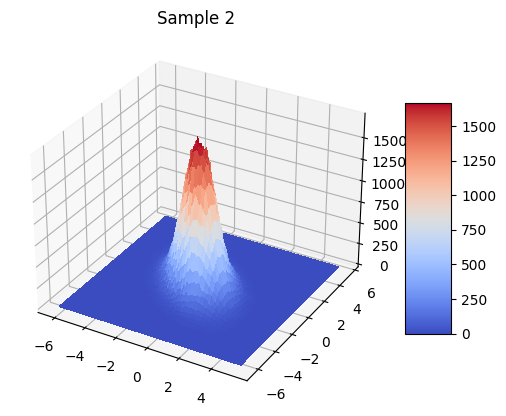

In [120]:
s2_xyz = getXYZ(s2, bins)
plot3D(*s2_xyz, "Sample 2")

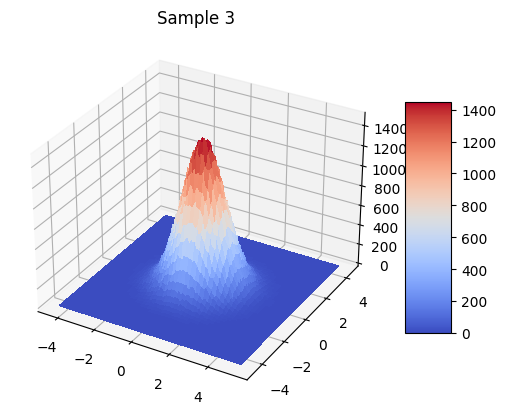

In [121]:
s3_xyz = getXYZ(s3, bins)
plot3D(*s3_xyz, "Sample 3")


Using the calculated histograms, now write a code to calculate the marginalized PDFs along both axes and then plot them.

In [104]:
def mPDF(hist):
    x, y, z = hist
    return ((x[0], z.sum(axis = 0)), (y[:,0], z.sum(axis = 1)))

def plotMPDF(pdf, label):
    plt.bar(*pdf, label = label, width = pdf[0][1] - pdf[0][0])
    plt.ylabel("Marginalized PDF")
    plt.legend()

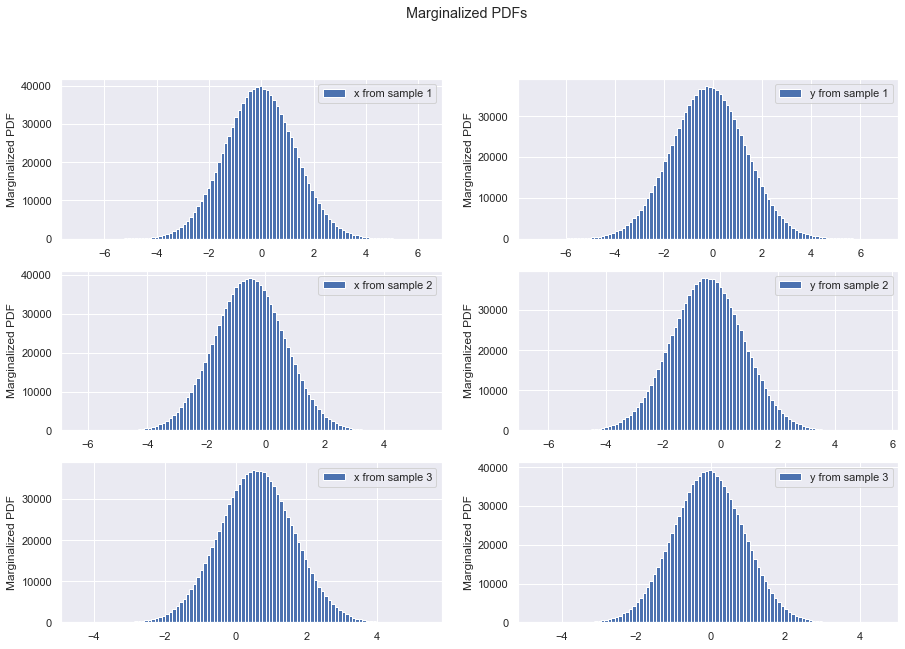

In [122]:
%matplotlib inline
sns.set() #Use this line to plot the marginalized PDFs with seaborn style

plt.figure(figsize=(15, 10))
plt.suptitle('Marginalized PDFs')

mpdf1 = mPDF(s1_xyz)
plt.subplot(321)
plotMPDF(mpdf1[0], "x from sample 1")
plt.subplot(322)
plotMPDF(mpdf1[1], "y from sample 1")

mpdf2 = mPDF(s2_xyz)
plt.subplot(323)
plotMPDF(mpdf2[0], "x from sample 2")
plt.subplot(324)
plotMPDF(mpdf2[1], "y from sample 2")

mpdf3 = mPDF(s3_xyz)
plt.subplot(325)
plotMPDF(mpdf3[0], "x from sample 3")
plt.subplot(326)
plotMPDF(mpdf3[1], "y from sample 3")

plt.show()

## Extra example:

You can also combine the two steps above and plot the joint PDF and the marginalized ones altogether using seaborn.

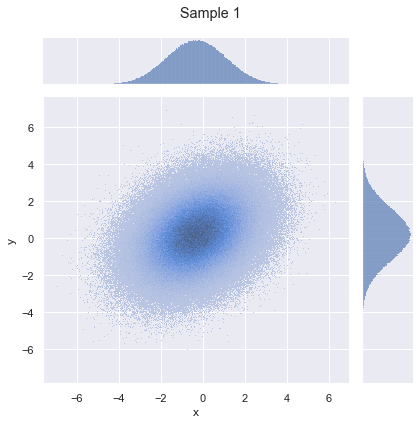

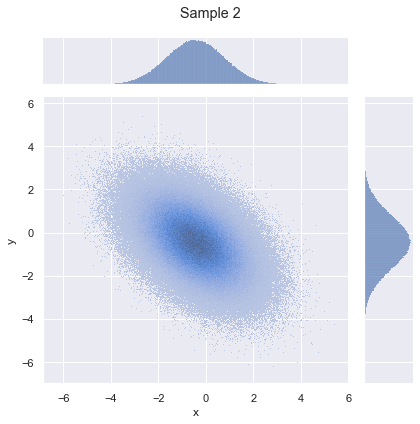

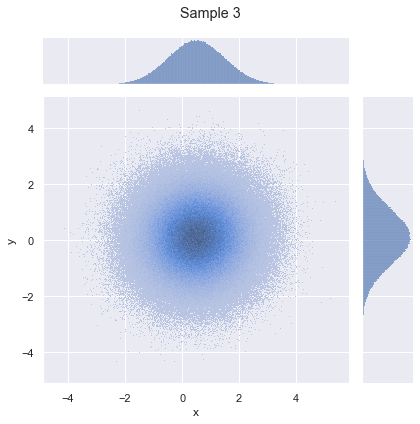

In [106]:
g1 = sns.jointplot(data=s1, x='x', y='y', kind='hist')
g1.fig.suptitle('Sample 1')
g1.fig.tight_layout()

g2 = sns.jointplot(data=s2, x='x', y='y', kind='hist')
g2.fig.suptitle('Sample 2')
g2.fig.tight_layout()

g3 = sns.jointplot(data=s3, x='x', y='y', kind='hist')
g3.fig.suptitle('Sample 3')
g3.fig.tight_layout()

plt.show()

## Contour Plots

Plot the contours of the datasets showing different values of contours.

In [158]:
def plotContours(x, y, z, title):
    contours = plt.contour(x, y, z, levels = 6)
    plt.clabel(contours, inline=1, fontsize=10)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.title(title)
    plt.show()

In [154]:
%matplotlib inline
matplotlib.rc_file_defaults() #Use this line to revert back to matplotlib default style

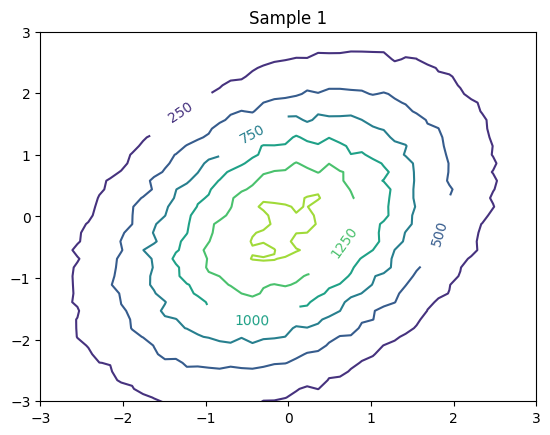

In [159]:
plotContours(*s1_xyz, "Sample 1")

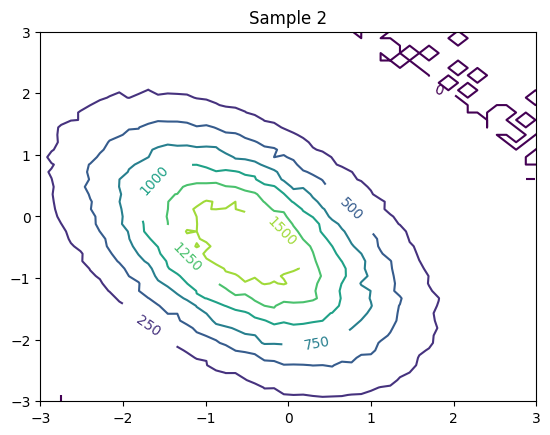

In [160]:
plotContours(*s2_xyz, "Sample 2")

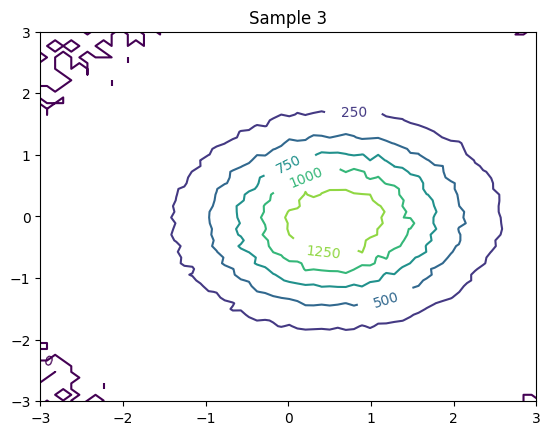

In [161]:
plotContours(*s3_xyz, "Sample 3")


## 3 parts
In the multivariate case, a gaussian distribution is defined via a mean and a covrience matrix. Here the covarience matrix is the equivalant of varience in higher dimensions. To refresh your mind, take a look at the [Wikipedia page](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Notation_and_parameterization). A correlation matrix is very similiar but has some [subtle differences](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices). 

Now using those defenitions, find the **covariance** (part 1) and **correlation** (part 2) matrices for each distribution. Are they the same? why? (part 3)

(Hint 1: You may find scipy.stats useful)

(Hint 2: Study the lecture note titled: 'parameter estimation 7' once more)

(Hint 3: [This lecture note](https://pages.ucsd.edu/~rlevy/lign251/fall2007/lecture_4.pdf) may also be useful, althogh the codes aren't written in python)

In [20]:
#Code here


## 2 parts

Now, only focus on the positievly correlated distribution. If the errors along both of the axes are huge, (as discussed in the lecture 'parameter estimation 7'), Is there a linear combination of the two parameters that can be well constrained? Discuss it (part 1).  Find the mode of the distribution (part 2)

In [21]:
#Code here


# Real World
let's apply this to real world data and using house price data. first import house_data.csv

In [4]:
data = pd.read_csv("House_price.csv")

you can see detail of your dataframe with the code below

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now select the columns of the train set with numerical data

In [14]:
num_data = data.select_dtypes(["int64", "float64"])

In [9]:
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Plot the distribution of all the numerical data

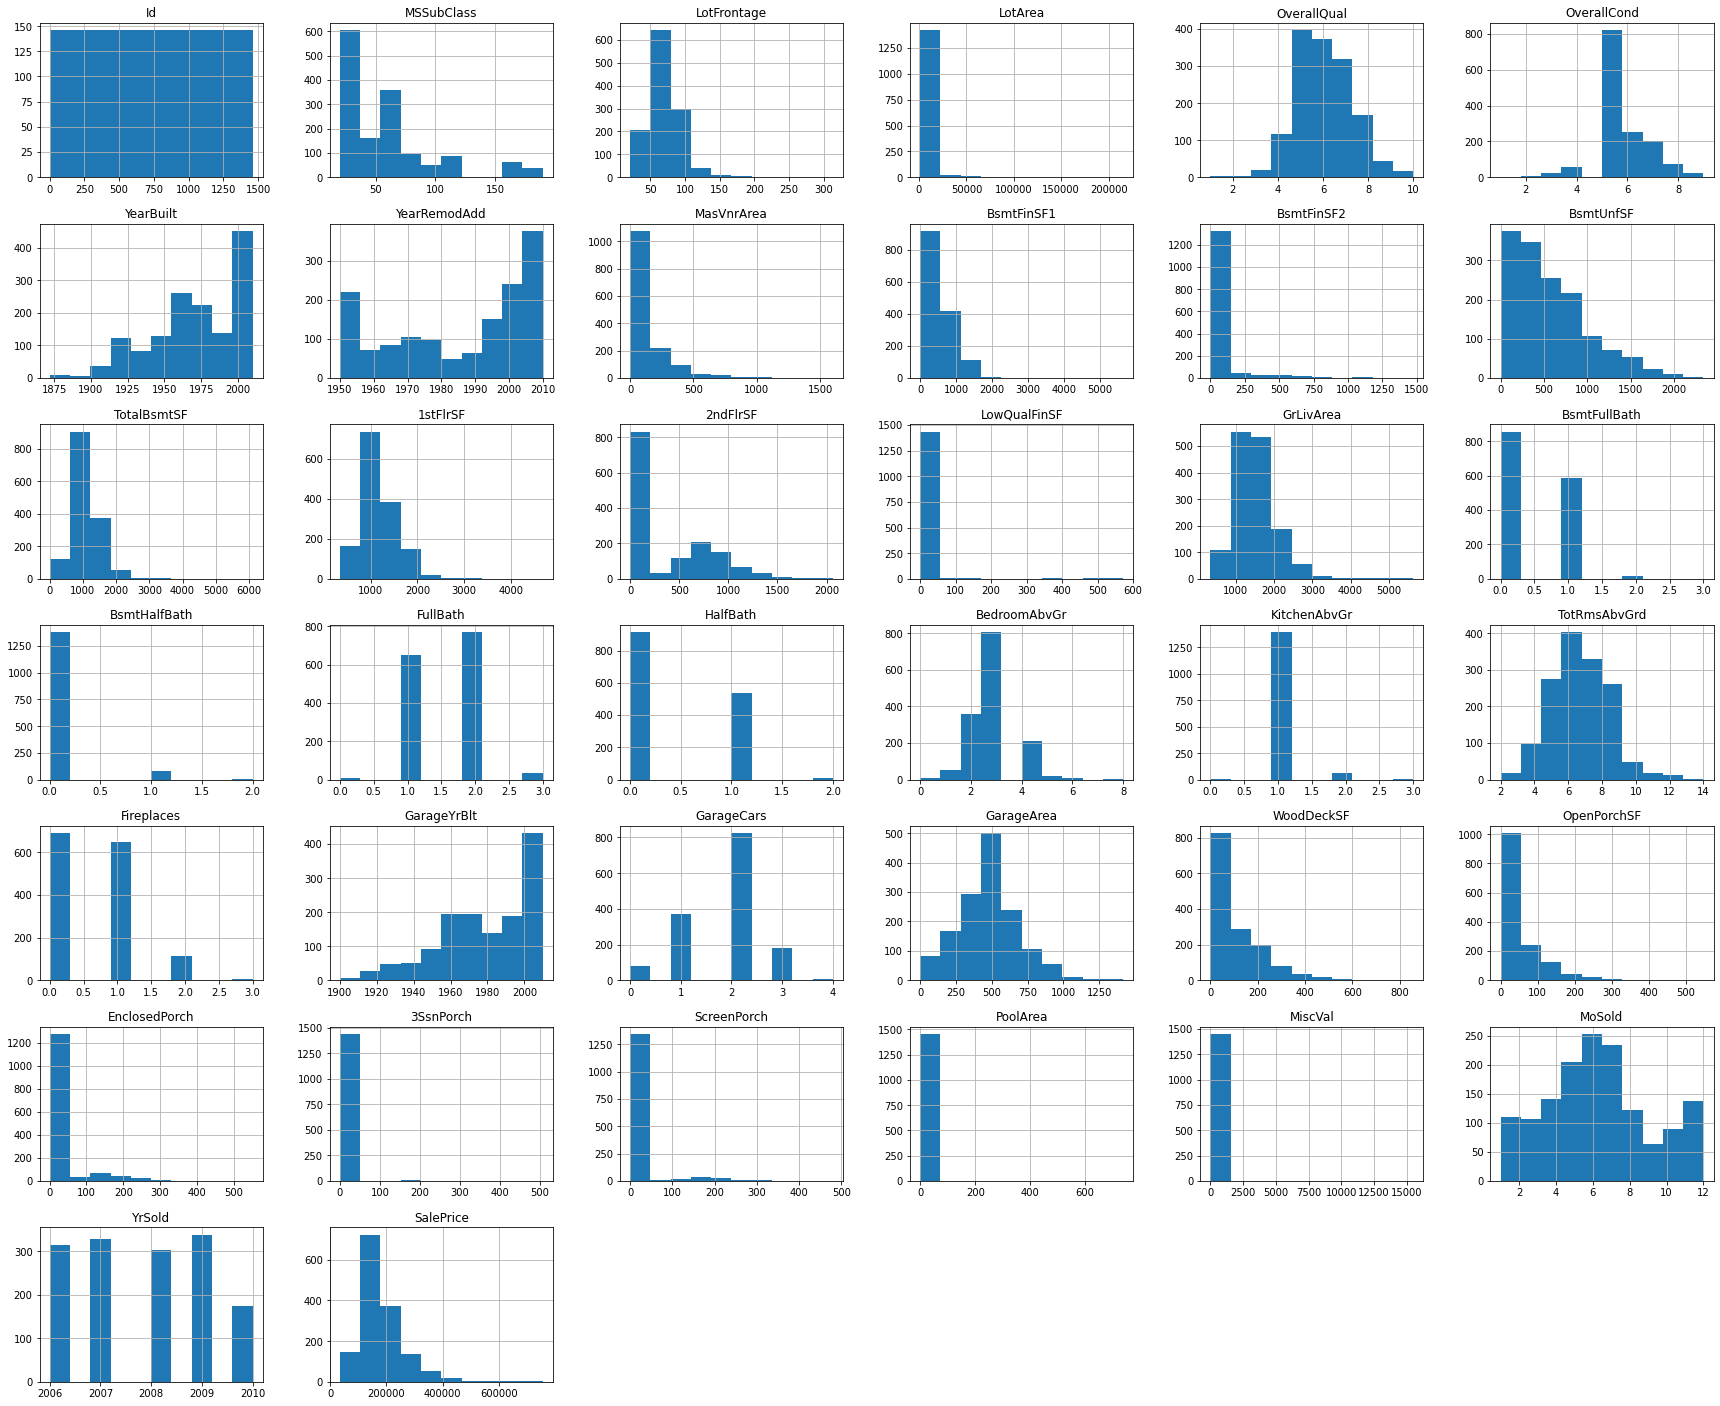

In [15]:
_ = num_data.hist(figsize=(30, 25))

plot Heatmap for all the remaining numerical data including the 'SalePrice'

In [27]:
num_data_corr = num_data.corr()

<AxesSubplot:>

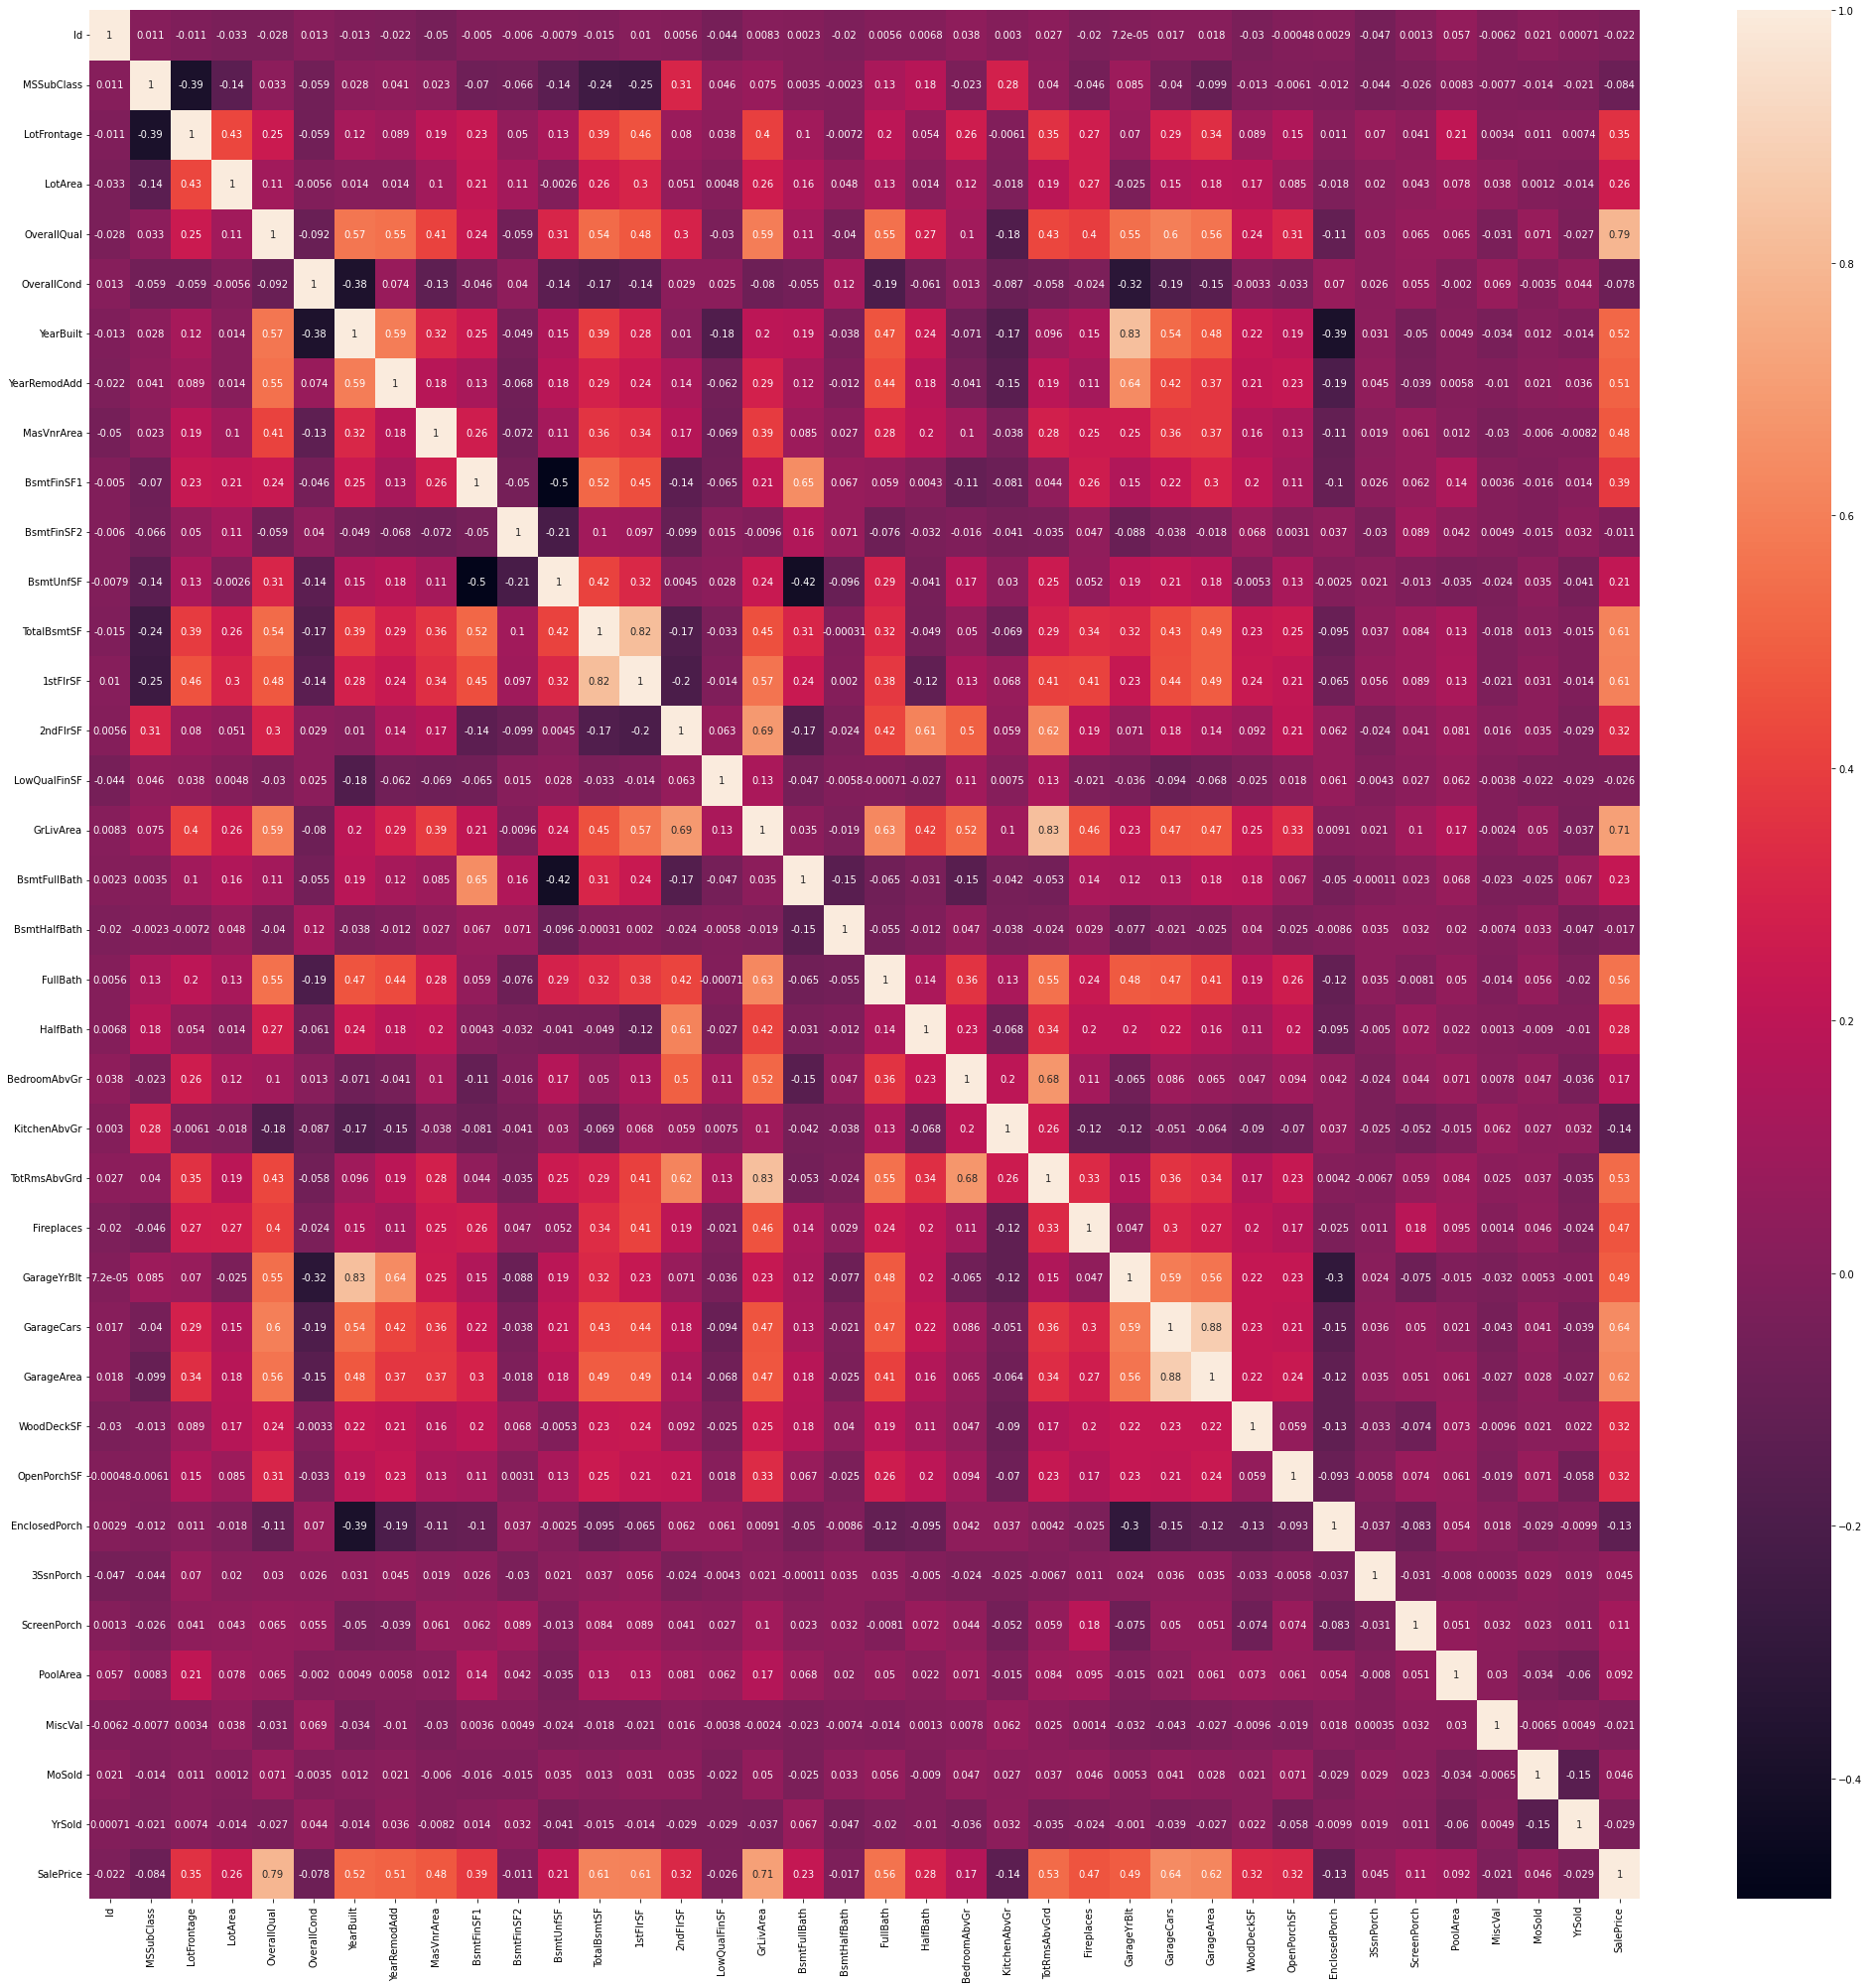

In [26]:
plt.figure(figsize = (35, 35))
sns.heatmap(num_data_corr, annot=True)

From the distribution of each numerical variables as well as the heatmap you can notice columns that are important and correlated (correlation higher than absolute 0.3) with our target variable 'SalePrice'. select columns where the correlation with 'SalePrice' is higher than |0.3|


In [64]:
num_data_corr.SalePrice[num_data_corr.SalePrice > 0.3].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

Now choose Features with high correlation (higher than 0.5) and plot the correlation of each feature with SalePrice

In [41]:
correlated_cols = num_data_corr.SalePrice[num_data_corr.SalePrice > 0.5].keys()

In [54]:
type(data.corr())

pandas.core.frame.DataFrame

<AxesSubplot:>

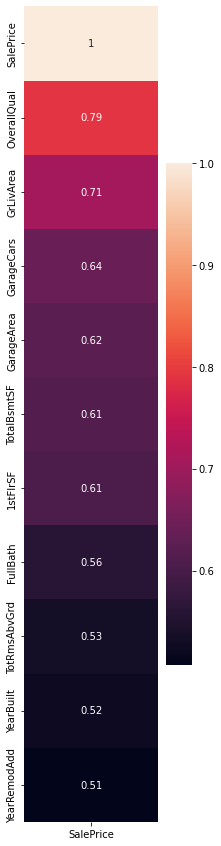

In [131]:
plt.figure(figsize = (3, 15))
sns.heatmap(num_data[correlated_cols].corr()[["SalePrice"]].sort_values("SalePrice", ascending=False), annot=True)

Check the NaN of dataframe set by ploting percent of missing values per column and plot the result

In [88]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values = missing_values[missing_values.percent_missing > 0]
missing_values

,percent_missing
LotFrontage,17.739726
Alley,93.767123
MasVnrType,0.547945
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


in the last session I think Amirreza said that droping Nan cells is not suited in many projects cause
it can remove alots of information of your dataframe. ofcourse he is right and I would like to give a short introduction to the process of handling Nan cells which is called "Imputation". Data imputation is the substitution of estimated values for missing or inconsistent data items (fields). The substituted values are intended to create a data record that does not fail edits. here you can use Simple_

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer you can check diffrent strategy 
my_imputer = SimpleImputer(strategy="median")
df_num_imputed = pd.DataFrame(my_imputer.fit_transform(df_num))
df_train_imputed.columns = df_train_num.columns

# Categorical features

## Explore and clean Categorical features

find all Catagorical columns. you can use the code for finding the numerical columns and just using 'object' for dtype.

In [89]:
cat_data = data.select_dtypes("object")

In [90]:
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Countplot for each of the categorical features in the train set

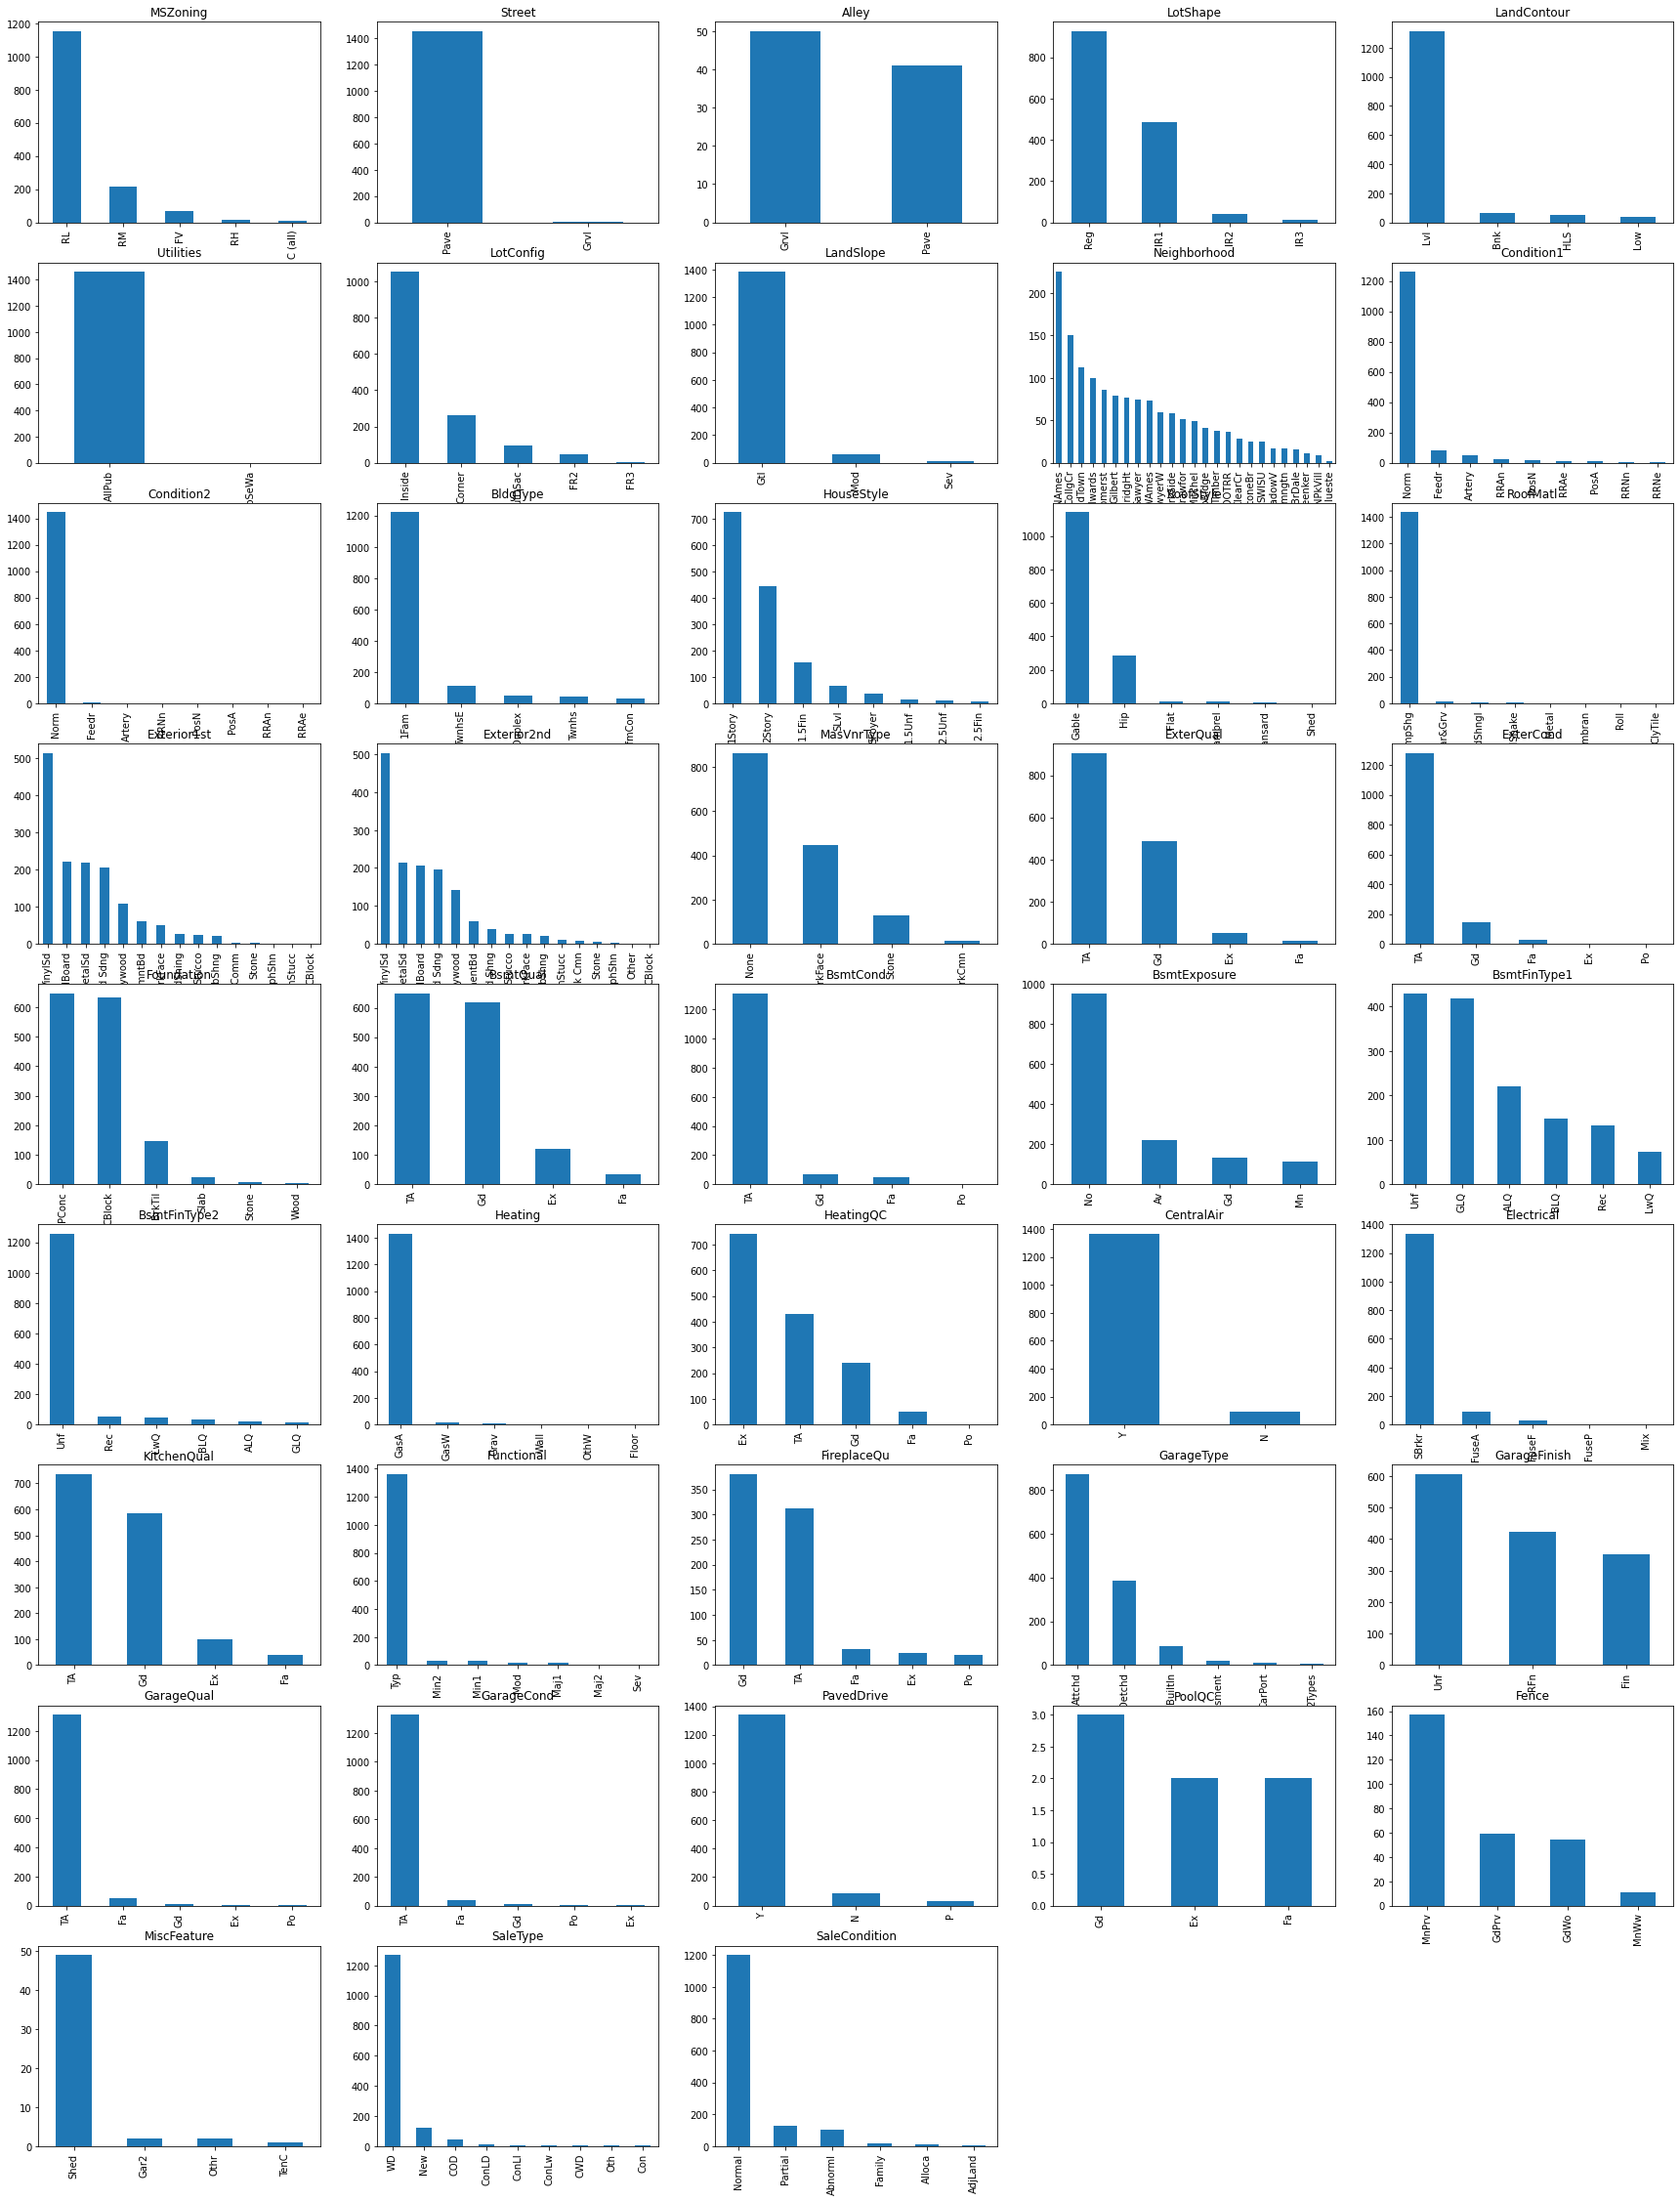

In [136]:
plt.figure(figsize=(30, 40))
for i, col in enumerate(cat_data):
    cat_data[col].value_counts().plot(kind="bar", ax=plt.subplot(len(cat_data.columns) // 5 + 1, 5, i + 1), title=col)